In [2]:
import pandas as pd
import random
import math
import csv
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('Data (copy).csv')
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  
df = df[~df["City"].str.contains(r"\(test\)")]

print(df)

             City  GDP (USD Billion)  Population (Millions)  Unemployment Rate (%)  Average Age  Women (%)  Men (%)  Budget (USD Billion)
0          Bogotá              103.5                   7.18                   10.5           32         52       48                 18.00
1        Medellín               44.1                   2.57                   11.2           31         53       47                  7.50
2            Cali               22.4                   2.30                   12.3           30         52       48                  3.00
3    Barranquilla               16.8                   1.23                   12.4           29         51       49                  3.10
4       Cartagena                8.6                   0.91                   13.0           31         51       49                  1.30
6         Pereira                6.2                   0.48                   12.0           32         52       48                  1.30
9     Santa Marta                5

¿Cuál es la media, mediana y desviación estándar?

In [3]:

def calcular_media(columna):
    return sum(columna) / len(columna)


def calcular_mediana(columna):
    columna_ordenada = sorted(columna)
    n = len(columna_ordenada)
    
    if n % 2 == 0:
    
        return (columna_ordenada[n//2 - 1] + columna_ordenada[n//2]) / 2
    else:
    
        return columna_ordenada[n//2]# Aplicar las funciones a cada columna y mostrar los resultados
columns_to_standardize = ['GDP (USD Billion)', 'Population (Millions)', 'Unemployment Rate (%)', 
                          'Average Age', 'Women (%)', 'Men (%)', 'Budget (USD Billion)']



def calcular_desviacion_estandar(columna):
    media = calcular_media(columna)
    varianza = sum((x - media) ** 2 for x in columna) / len(columna)
    return varianza ** 0.5

def calcular_moda(columna):
    frecuencia = {}
    for valor in columna:
        if valor in frecuencia:
            frecuencia[valor] += 1
        else:
            frecuencia[valor] = 1

   
    moda = max(frecuencia, key=frecuencia.get)
    repeticiones = frecuencia[moda]

    return moda, repeticiones

    
for column in columns_to_standardize:
    media = calcular_media(df[column])
    mediana = calcular_mediana(df[column])
    des_est = calcular_desviacion_estandar(df[column])
    moda =  calcular_moda(df[column])
    
    
    print(f"Media de {column}: {media}")
    print(f"Mediana de {column}: {mediana}")
    print(f"Desviacion estandar de {column}: {des_est}")
    print(f"moda de {column}: {moda}")
    print() 


Media de GDP (USD Billion): 9.72
Mediana de GDP (USD Billion): 2.5
Desviacion estandar de GDP (USD Billion): 21.266010439196155
moda de GDP (USD Billion): (103.5, 1)

Media de Population (Millions): 0.7995999999999998
Mediana de Population (Millions): 0.35
Desviacion estandar de Population (Millions): 1.4415199755813304
moda de Population (Millions): (0.43, 2)

Media de Unemployment Rate (%): 13.656
Mediana de Unemployment Rate (%): 13.0
Desviacion estandar de Unemployment Rate (%): 2.5196952196644737
moda de Unemployment Rate (%): (12.4, 2)

Media de Average Age: 29.4
Mediana de Average Age: 30
Desviacion estandar de Average Age: 2.0396078054371136
moda de Average Age: (31, 6)

Media de Women (%): 51.56
Mediana de Women (%): 52
Desviacion estandar de Women (%): 0.8039900496896714
moda de Women (%): (52, 10)

Media de Men (%): 48.44
Mediana de Men (%): 48
Desviacion estandar de Men (%): 0.8039900496896714
moda de Men (%): (48, 10)

Media de Budget (USD Billion): 1.7159999999999997
Medi

#COVARIAZA y CORRELACION

In [4]:
def covarianza(X, Y):
    if len(X) != len(Y):
        raise ValueError("Las listas X y Y deben tener el mismo número de elementos.")
    
    media_X = calcular_media(X)
    media_Y = calcular_media(Y)
    suma_covarianza = 0
    
    for i in range(len(X)):
        suma_covarianza += (X[i] - media_X) * (Y[i] - media_Y)
    
    covarianza_resultado = suma_covarianza / len(X)
    
    return covarianza_resultado


def correlacion(X, Y):
    cov = covarianza(X, Y)
    std_X = calcular_desviacion_estandar(X)
    std_Y = calcular_desviacion_estandar(Y)
    
    correlacion_resultado = cov / (std_X * std_Y)
    
    return correlacion_resultado


df_clean = df[['GDP (USD Billion)', 'Population (Millions)']].dropna()

GDP = df_clean['GDP (USD Billion)'].tolist()
Population = df_clean['Population (Millions)'].tolist()

media_GDP = calcular_media(GDP)
std_GDP = calcular_desviacion_estandar(GDP)

media_Population = calcular_media(Population)
std_Population = calcular_desviacion_estandar(Population)

GDP_std = [(x - media_GDP) / std_GDP for x in GDP]
Population_std = [(x - media_Population) / std_Population for x in Population]


X = GDP_std
Y = Population_std

resultado_covarianza = covarianza(X, Y)
correlacion_resultado = correlacion(X,Y)
print(f"La covarianza entre 'GDP_std' y 'Population_std' es: {resultado_covarianza}")
print(f"La correlacion entre 'GDP_std' y 'Population_std' es: {correlacion_resultado}")
print(df.columns)

La covarianza entre 'GDP_std' y 'Population_std' es: 0.9911098521938166
La correlacion entre 'GDP_std' y 'Population_std' es: 0.9911098521938162
Index(['City', 'GDP (USD Billion)', 'Population (Millions)', 'Unemployment Rate (%)', 'Average Age', 'Women (%)', 'Men (%)', 'Budget (USD Billion)'], dtype='object')


Relación entre Covarianza y Correlación

Normalización: La correlación se deriva de la covarianza al dividirla por el
            producto de las desviaciones estándar de las dos variables. 
            Esto normaliza la medida de la relación, permitiendo comparaciones más 
            significativas entre diferentes pares de variables.

Interpretación: Mientras que la covarianza puede ser difícil de interpretar 
                debido a su escala, la correlación proporciona una medida más intuitiva 
                de la relación entre las variables.

    pata la correlacion : 
    Un valor de 1 indica una relación lineal positiva perfecta.
    Un valor de -1 indica una relación lineal negativa perfecta.
    Un valor de 0 indica que no hay relación lineal.

    para la covarianza:
    La covarianza mide cómo varían juntas dos variables. 
    Si ambas variables tienden a aumentar o disminuir juntas, la covarianza será positiva. 
    Si una variable aumenta mientras la otra disminuye, la covarianza será negativa. 
    Si no hay una relación clara, la covarianza será cercana a cero

Ejemplo con Datos:
Covarianza entre 'GDP_std' y 'Population_std':  0.9901160561840509
Esto indica que, a medida que el PIB estandarizado (GDP_std) aumenta, la   poblaciónestandarizada (Population_std) también tiende a aumentar, ya que la covarianza es positiva.

Correlación entre 'GDP_std' y 'Population_std': 0.9901160561840511
Este valor cercano a 1 indica que hay una relación lineal muy cercana a 1 entre el PIB estandarizado y la población estandarizada. Esto significa que, además de que tienden a aumentar juntos, la relación es muy alta.



/tmp/ipykernel_119054/833213387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prueba["City"] = df_prueba["City"].str.replace(r"\(test\)", "").str.strip()
/tmp/ipykernel_119054/833213387.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entrenamiento['cluster'] = etiquetas_entrenamiento
/tmp/ipykernel_119054/833213387.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Convergencia alcanzada en la iteración 3


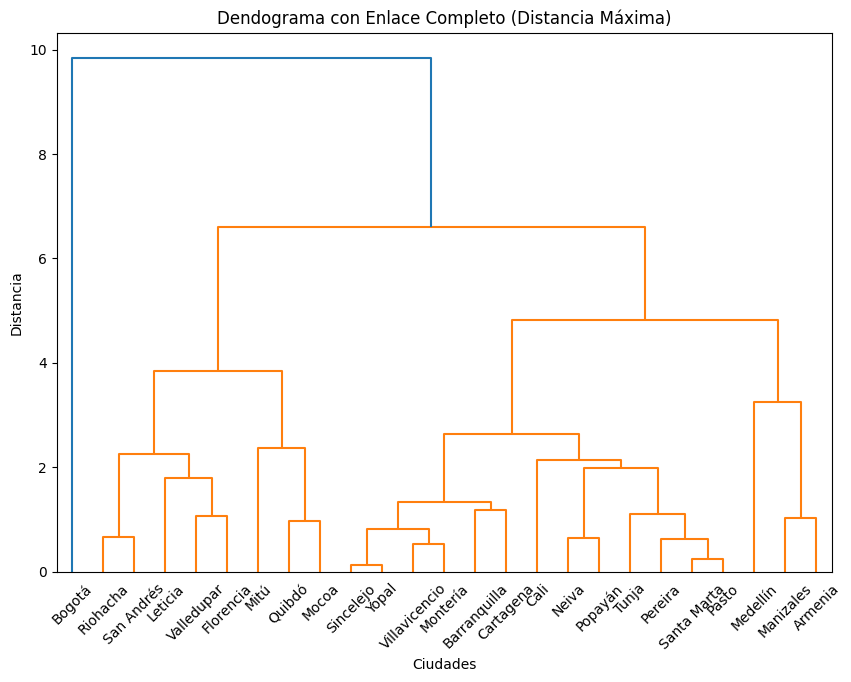

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('Data.csv')

df_prueba = df[df["City"].str.contains(r"\(test\)")]
df_entrenamiento = df[~df["City"].str.contains(r"\(test\)")]
df_prueba["City"] = df_prueba["City"].str.replace(r"\(test\)", "").str.strip()

def escalarDatos(X):
    return (X - X.mean()) / X.std()

X_entrenamiento = df_entrenamiento.drop(columns=['City'])
X_prueba = df_prueba.drop(columns=['City'])

X_entrenamiento_escalado = escalarDatos(X_entrenamiento)
X_prueba_escalado = escalarDatos(X_prueba)

def kmeans(X, k, max_iters=100, umbral=1e-4):
    np.random.seed(42)
    centroides = X.sample(n=k).values
    for _ in range(max_iters):
        etiquetas = np.array([np.argmin([np.linalg.norm(x - centroide) for centroide in centroides]) for x in X.values])
        nuevos_centroides = np.array([X.values[etiquetas == i].mean(axis=0) for i in range(k)])
        if np.all(np.abs(centroides - nuevos_centroides) < umbral):
            print(f"Convergencia alcanzada en la iteración {_+1}")
            break
        centroides = nuevos_centroides
    return etiquetas, centroides




k = 6 
etiquetas_entrenamiento, centroides = kmeans(X_entrenamiento_escalado, k)
df_entrenamiento['cluster'] = etiquetas_entrenamiento

etiquetas_prueba = np.array([np.argmin([np.linalg.norm(x - centroide) for centroide in centroides]) for x in X_prueba_escalado.values])
df_prueba['cluster'] = etiquetas_prueba

def distancia_euclidiana(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


df_prueba['CiudadCercana'] = ''

for i, fila in df_prueba.iterrows():
    cluster = fila['cluster']
    centroide = centroides[cluster]
    
    df_entrenamiento_cluster = df_entrenamiento[df_entrenamiento['cluster'] == cluster]
    X_entrenamiento_cluster_escalado = X_entrenamiento_escalado.loc[df_entrenamiento_cluster.index]
    
    distancias = [distancia_euclidiana(centroide, x) for x in X_entrenamiento_cluster_escalado.values]
    
    ciudad_cercana = df_entrenamiento_cluster.iloc[np.argmin(distancias)]['City']
    
    df_prueba.loc[i, 'CiudadCercana'] = ciudad_cercana

df_envio = df_prueba[['City', 'CiudadCercana']]
df_envio.to_csv('enviar.csv', index=False)

def calcular_distancias(X):
    n = len(X)
    distancias = np.zeros((n * (n - 1)) // 2)  
    idx = 0
    for i in range(n):
        for j in range(i + 1, n):
            distancias[idx] = distancia_euclidiana(X[i], X[j])
            idx += 1
    return distancias

distancias = calcular_distancias(X_entrenamiento_escalado.values)
Z = linkage(distancias, method='complete')


plt.figure(figsize=(10, 7))
plt.title('Dendograma con Enlace Completo (Distancia Máxima)')
dendrogram(Z, labels=df_entrenamiento['City'].values)
plt.xlabel('Ciudades')
plt.ylabel('Distancia')
plt.show()

PCA

Matriz de Covarianza:
[[1.         0.99110985]
 [0.99110985 1.        ]]

Eigenvalues:
[0.00889015 1.99110985]
Eigenvectors:
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Varianza Explicada por Cada Eigenvalue:
[0.00444507 0.99555493]

Proyección de los Datos en 1D:
[-6.12177097 -1.97094384 -1.13421784 -0.4375156  -0.016572    0.26828273
  0.32815027  0.37050266  0.34663304  0.38043756  0.3677286   0.38385671
  0.45130449  0.4674326   0.48836689  0.50123712  0.52217141  0.53023547
  0.54636358  0.59613494  0.62342371  0.59303834  0.64435801  0.6412614
  0.63010074]

Error de Proyección:
0.461912921824461


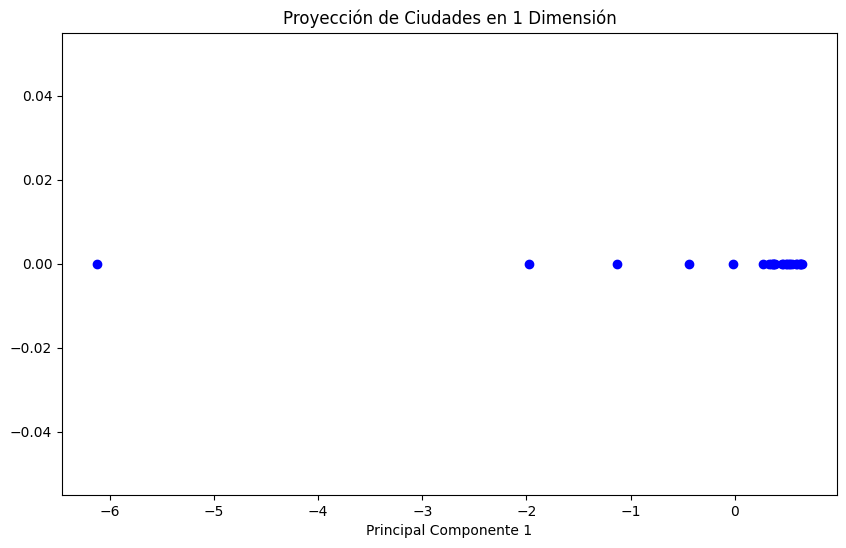

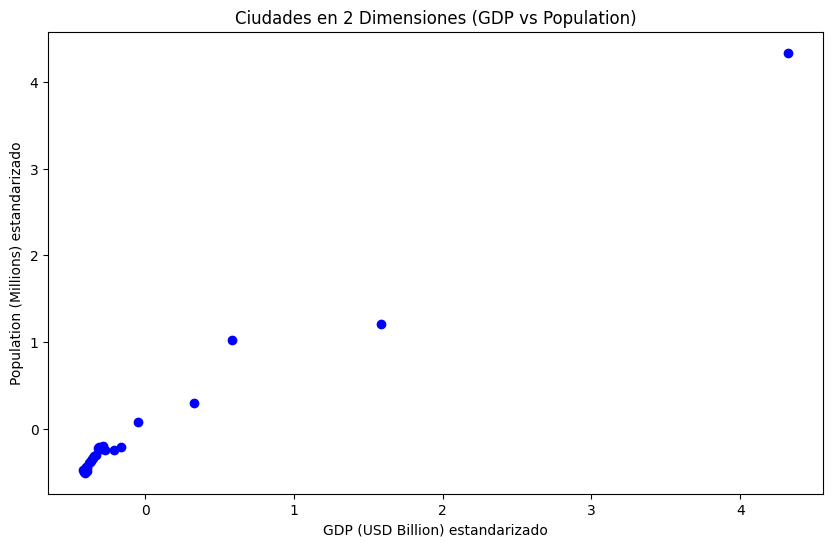

In [18]:

GDP_std = escalarDatos(df_clean['GDP (USD Billion)'])
Population_std = escalarDatos(df_clean['Population (Millions)'])
matriz_estandarizada = np.array([GDP_std, Population_std])

cov_matrix = np.cov(matriz_estandarizada)
print("Matriz de Covarianza:")
print(cov_matrix)
print ()

#Eigenvalues y Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)
print()

#Varianza Explicada
explained_variance = eigenvalues / np.sum(eigenvalues)
print("Varianza Explicada por Cada Eigenvalue:")
print(explained_variance)
print()


principal_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
proyeccion_1dimension = np.dot(matriz_estandarizada.T, principal_eigenvector)

reconstruccion = np.outer(proyeccion_1dimension, principal_eigenvector)

print("Proyección de los Datos en 1D:")
print(proyeccion_1dimension)
print()

#Error
error_proyeccion = np.linalg.norm(matriz_estandarizada.T - reconstruccion)
print("Error de Proyección:")
print(error_proyeccion)


plt.figure(figsize=(10, 6))
plt.scatter(proyeccion_1dimension, np.zeros_like(proyeccion_1dimension), c='blue', label='Cities')
plt.title('Proyección de Ciudades en 1 Dimensión')
plt.xlabel('Principal Componente 1')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(GDP_std, Population_std, c='blue', label='Ciudades')
plt.title('Ciudades en 2 Dimensiones (GDP vs Population)')
plt.xlabel('GDP (USD Billion) estandarizado')
plt.ylabel('Population (Millions) estandarizado')
plt.show()
